In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta


import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
price = pd.read_csv('Brownian.csv')
price['Closing Price'] = price['Closing Price'].astype('int64')
price['Date'] = pd.to_datetime(price['Date'], format='%d/%m/%Y')

# Set the "Date" column as the index
price.set_index('Date', inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

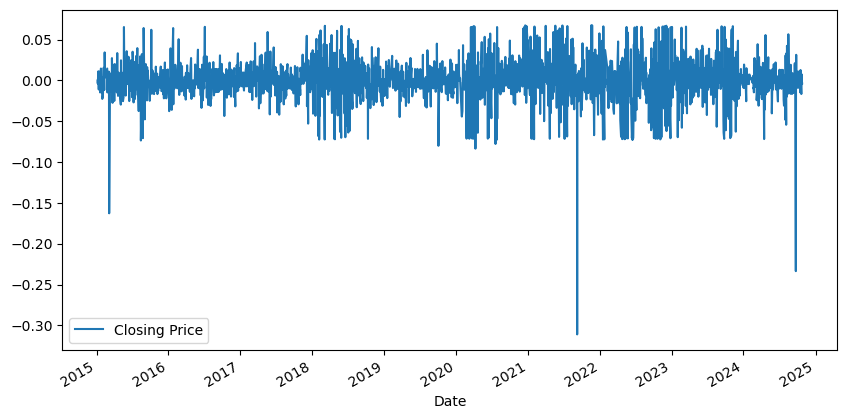

In [4]:
#Return and volatility
log_returns = np.log(price/price.shift(1)).dropna()
log_returns.plot(figsize=(10,5))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

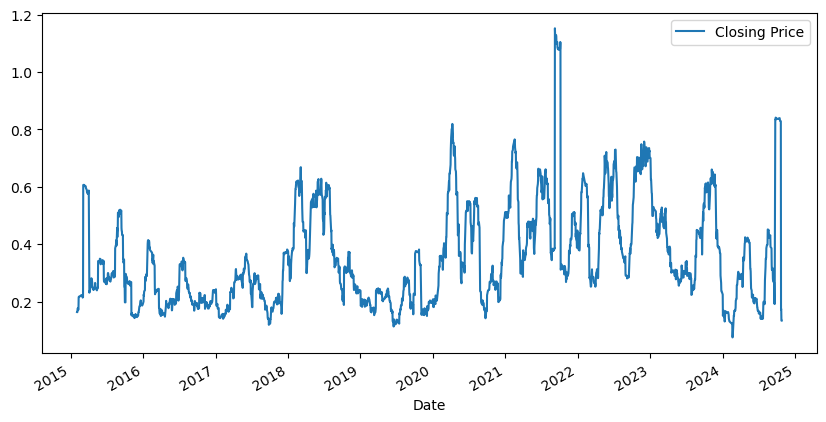

In [5]:
rolling_window_days = 21
volatility = log_returns.rolling(window=rolling_window_days).std() * np.sqrt(252)
volatility.plot(figsize=(10,5))
plt.show

In [15]:
s0 = price['Closing Price'].iloc[2432]
r = 0.05
vol =  0.004015858310115656 * 5 #daily volatility
T = 1
n_time_intervals = 252
n_sim = 10000

delta_t = T/n_time_intervals
S_fwd = np.zeros((n_time_intervals+1, n_sim))
S_fwd[0]=s0
s0

27900

In [16]:

log_S_fwd = np.zeros((n_time_intervals + 1, n_sim))
log_S_fwd[0] = np.log(s0)

for t in range(1, n_time_intervals + 1):
    log_S_fwd[t] = log_S_fwd[t-1] + (r - 0.5 * vol**2) * delta_t + vol * np.sqrt(delta_t) * np.random.standard_normal(n_sim)

S_fwd = np.exp(log_S_fwd)  # Chuyển đổi lại từ log


In [21]:
delta_price = (S_fwd[-1].mean() - s0) / s0
delta_price_percentage = "{:.2%}".format(delta_price)
print("Stock Price forecast: ", delta_price_percentage)

Stock Price forecast:  5.10%


In [22]:
print(S_fwd[-1][:10]) 

[29177.49527048 29490.61407809 29726.48968549 29928.50951345
 29583.40336718 28258.13549958 28252.0961791  28749.09553711
 28860.97179638 29124.54820088]


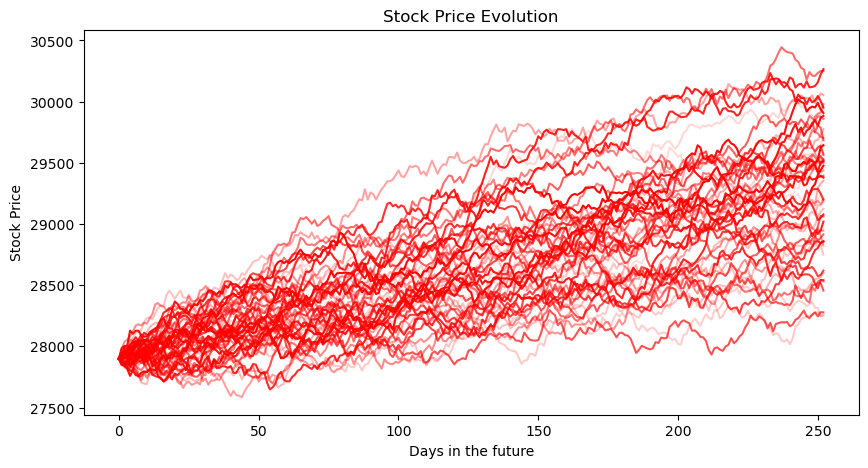

In [23]:
#Visualize
plt.figure(figsize=(10,5))
for i in range(50):
    alpha = 0.1 + i * 0.018  # Điều chỉnh giá trị alpha để tạo độ đậm nhạt
    plt.plot(S_fwd[:, i], color='red', alpha=alpha)
plt.xlabel('Days in the future')
plt.ylabel('Stock Price')
plt.title('Stock Price Evolution')
plt.show()


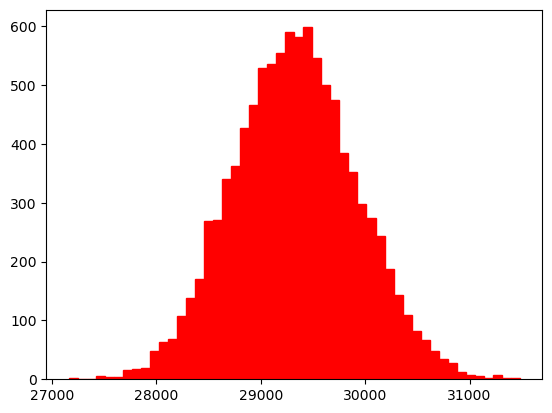

In [24]:
plt.figure()
plt.hist(S_fwd[-1], bins=50,color='red',edgecolor='red', linewidth=1)
plt.show()

In [25]:
import numpy as np

final_prices = S_fwd[-1]
expected_price = np.mean(final_prices)
std_dev = np.std(final_prices)
percentile_5 = np.percentile(final_prices, 5)
percentile_95 = np.percentile(final_prices, 95)

print("Expected Final Price:", expected_price)
print("Standard Deviation of Final Prices:", std_dev)
print("5th Percentile:", percentile_5)
print("95th Percentile:", percentile_95)

Expected Final Price: 29324.014553042878
Standard Deviation of Final Prices: 588.237406215625
5th Percentile: 28374.339334049168
95th Percentile: 30300.035403771813


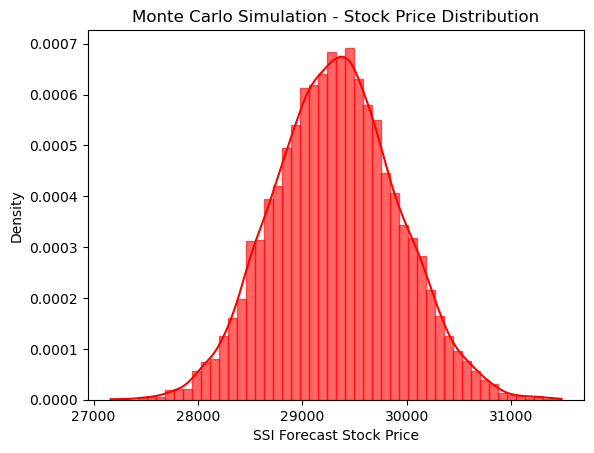

In [26]:
from scipy.stats import gaussian_kde

plt.figure()
density = gaussian_kde(final_prices)
x_vals = np.linspace(min(final_prices), max(final_prices), 1000)
plt.hist(final_prices, bins=50,color='red',edgecolor='red', linewidth=1, density=True, alpha=0.6)
plt.plot(x_vals, density(x_vals), color='red')  # Adds a PDF curve
plt.title("Monte Carlo Simulation - Stock Price Distribution")
plt.xlabel("SSI Forecast Stock Price")
plt.ylabel("Density")
plt.show()